# Salary Dataset - Simple Linear Regression

This notebook demonstrates a simple linear regression workflow using a salary dataset from Kaggle. Each step is explained with markdown between code cells.

## Dataset Source

https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

### Downloading the Dataset

We use `kagglehub` to download the salary dataset from Kaggle.

In [44]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Salary_dataset.csv"
# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "abhishek14398/salary-dataset-simple-linear-regression",
  file_path
)

print("First 5 records:", df.head())

First 5 records:    Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


### Dataset Info

Check the structure and types of the dataset.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


### Dataset Statistics

Summary statistics of the dataset.

In [46]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


### Data Visualization

Visualize the relationship between years of experience and salary.

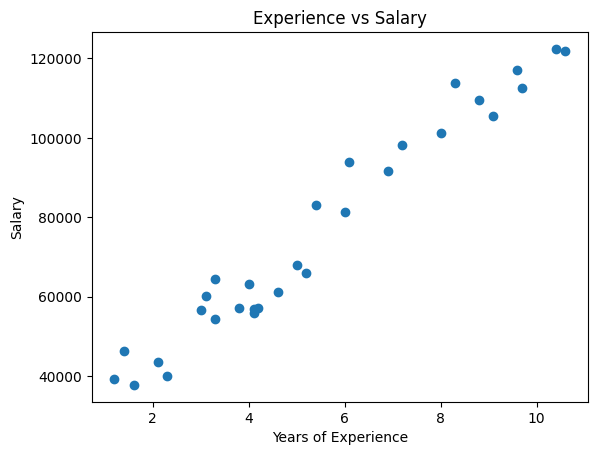

In [47]:
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

### Feature Selection

Select features and target variable for model training.

In [48]:
X = df[['YearsExperience']]
y = df['Salary']

### Train-Test Split

Split the data into training and testing sets.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Manual Linear Regression Calculation

Calculate the regression coefficients manually for educational purposes.

In [50]:
import numpy as np

x = X_train.values.flatten()
y = y_train.values

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

b1 = numerator / denominator
b0 = y_mean - b1 * x_mean

print(f"Calculated coefficients: b0 = {b0}, b1 = {b1}")

Calculated coefficients: b0 = 24380.201479473697, b1 = 9423.815323030978


### Linear Regression with scikit-learn

Fit a linear regression model using scikit-learn.

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Sklearn coefficients: b0 = {model.intercept_}, b1 = {model.coef_[0]}")

Sklearn coefficients: b0 = 24380.20147947369, b1 = 9423.81532303098


### Model Prediction

Predict salaries for the test set.

In [52]:
y_pred = model.predict(X_test)

### Prediction Results

Compare actual and predicted values.

In [53]:
import pandas as pd
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_pred.head()

,Actual,Predicted
27,112636.0,115791.210113
15,67939.0,71499.278095
23,113813.0,102597.868661
17,83089.0,75268.804224
8,64446.0,55478.792045


### Model Evaluation

Evaluate the model using mean squared error and R-squared.

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Squared Error: 49830096.85590837
R-squared: 0.9024461774180498
Root Mean Squared Error: 7059.043621901509


### Visualization of Model Predictions

The following plot shows the predictions of the model compared to the actual values in the test set.

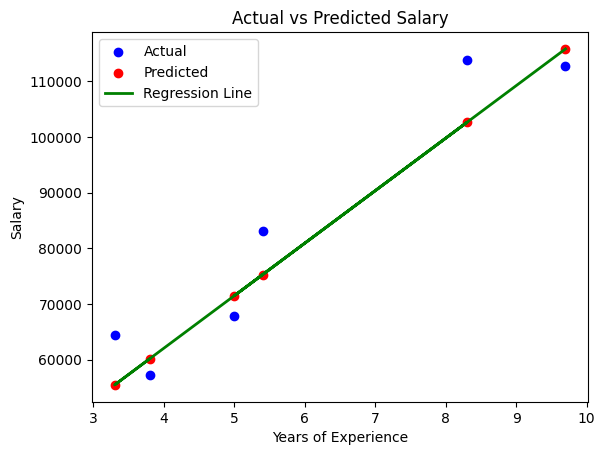

In [55]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

### Residual Analysis

Plot the residuals to check for patterns.

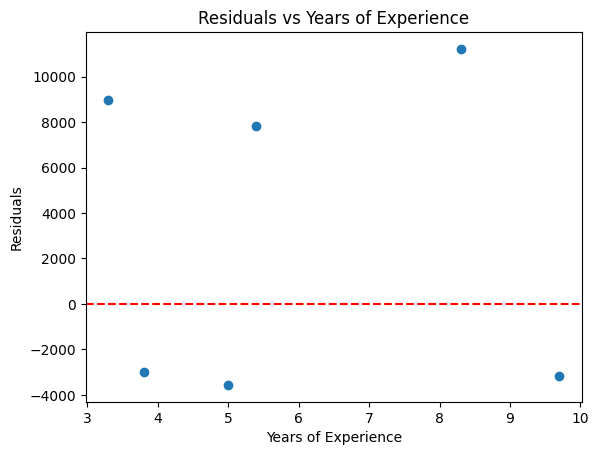

In [56]:
residuals = y_test - y_pred

plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.title('Residuals vs Years of Experience')
plt.show()